In [1]:
#check python version
from platform import python_version
print(python_version())

3.7.4


In [2]:
#import packages for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import researchpy as rp
from IPython.display import display

#disable pandas chained assignment warning
pd.options.mode.chained_assignment = None

In [3]:
#import *.csv spreadsheet and assign to the variable `df`
df = pd.read_csv('Churn_Data/churn_clean.csv')

# Part 1: Data Ceaning and Preparation

#### Steps:
1. Check for null and duplicate values
2. Remove columns that are not predictors
3. Replace binary "Yes and "No" variables with 1 and 0 respectively
4. Ensure categorical variables do not have too many levels
    * Then pivot into dummy variables
5. Ensure datatypes are correct

In [4]:
#check for null values
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
CaseOrder               10000 non-null int64
Customer_id             10000 non-null object
Interaction             10000 non-null object
UID                     10000 non-null object
City                    10000 non-null object
State                   10000 non-null object
County                  10000 non-null object
Zip                     10000 non-null int64
Lat                     10000 non-null float64
Lng                     10000 non-null float64
Population              10000 non-null int64
Area                    10000 non-null object
TimeZone                10000 non-null object
Job                     10000 non-null object
Children                10000 non-null int64
Age                     10000 non-null int64
Income                  10000 non-null float64
Marital                 10000 non-null object
Gender                  10000 non-null object
Churn               

In [5]:
#Check for and remove any duplicate values
#count rows before duplicates are dropped
obs_before_drop = len(df)
#drop all duplicate rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
#verify number of duplicate observations dropped
print("Total Observations dropped:",(obs_before_drop - len(df)))

Total Observations dropped: 0


In [6]:
#remove non-predictor columns
df.drop(columns=['CaseOrder','Customer_id','Interaction','UID','Lat','Lng',
                'City','State','County','Zip'],inplace=True)

In [7]:
#define categorical variables
cat_vars = ['Area','TimeZone','Job','Marital','Gender',
            'Contract','InternetService','PaymentMethod']
#check value counts for each categorical variable
for var in cat_vars:
    print('{}:'.format(var),len(df[var].value_counts().index))

Area: 3
TimeZone: 25
Job: 639
Marital: 5
Gender: 3
Contract: 3
InternetService: 3
PaymentMethod: 4


In [8]:
#drop job since it has way too many levels (drop it from reference `cat_vars` variable as well)
df.drop(columns='Job', inplace=True)
cat_vars.remove('Job')
#consolidate values of TimeZone
df['TimeZone'] = df['TimeZone'].replace({"America/New_York":"EST",
                                        "America/Chicago":"CST",
                                        "America/Los_Angeles":"PST",
                                        "America/Denver":"MST",
                                        "America/Detroit":"EST",
                                        "America/Indiana/Indianapolis":"EST",
                                        "America/Phoenix":"MST",
                                        "America/Boise":"MST",
                                        "America/Anchorage":"Alaska",
                                        "America/Puerto_Rico":"Atlantic",
                                        "Pacific/Honolulu":"Hawaii",
                                        "America/Menominee":"CST",
                                        "America/Nome":"Alaska",
                                        "America/Kentucky/Louisville":"EST",
                                        "America/Sitka":"Alaska",
                                        "America/Indiana/Tell_City":"CST",
                                        "America/Indiana/Vincennes":"EST",
                                        "America/Toronto":"EST",
                                        "America/Indiana/Petersburg":"EST",
                                        "America/Juneau":"Alaska",
                                        "America/North_Dakota/New_Salem":"CST",
                                        "America/Indiana/Winamac":"CST",
                                        "America/Indiana/Knox":"CST",
                                        "America/Indiana/Marengo":"EST",
                                        "America/Ojinaga":"MST"})
#ensure successful result
df['TimeZone'].value_counts()

EST         4549
CST         3698
PST          887
MST          714
Alaska        77
Atlantic      40
Hawaii        35
Name: TimeZone, dtype: int64

In [9]:
#define binary variables
binary_vars = ['Churn','Techie','Port_modem','Tablet','Phone',
               'Multiple','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV',
               'StreamingMovies','PaperlessBilling']
#replace Yes and No with 1 and 0 for binary variables
for var in binary_vars:
    df[var] = df[var].replace({"No":"0", "Yes":"1"})

#transform categorical variables
#retain cat_df for univariate analysis of categorical variables
cat_df = df[cat_vars]
cat_df = cat_df.join(df['Churn'])
#loop through categorical variables and create dummy variables
for var in cat_vars:
    dummies = pd.get_dummies(df[var], drop_first=True)
    #rename each dummy variable to include original column title
    for col in dummies:
        dummies.rename(columns={col:'{}_{}'.format(var,col)}, inplace=True)
    #join each dummy dataframe to original table
    df = df.join(dummies)
    #drop categorical variable from original dataframe
    df.drop(columns=var, inplace=True)

#Ensure all datatypes are correct
#define original numeric variables for later univariate analysis
numeric_vars = ['Population','Children','Age','Income',
                'Outage_sec_perweek','Email','Contacts',
                'Yearly_equip_failure','Tenure','MonthlyCharge',
                'Bandwidth_GB_Year']
#ensure datatypes are numeric for all variables in remaining dataframe including binary and dummy variables
for var in df.columns:
    df[var] = pd.to_numeric(df[var])

## Univariate Visualization

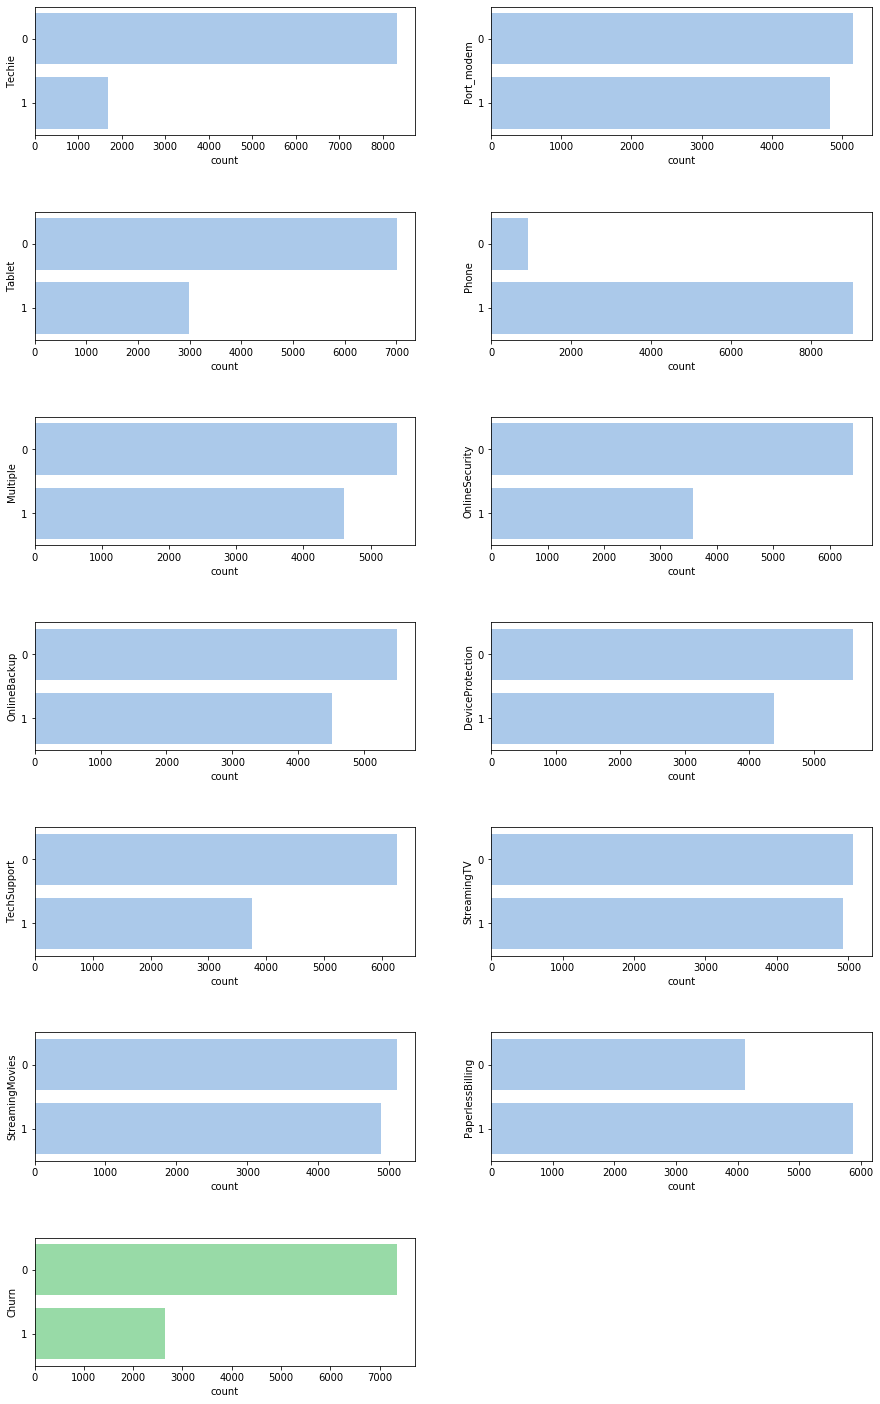

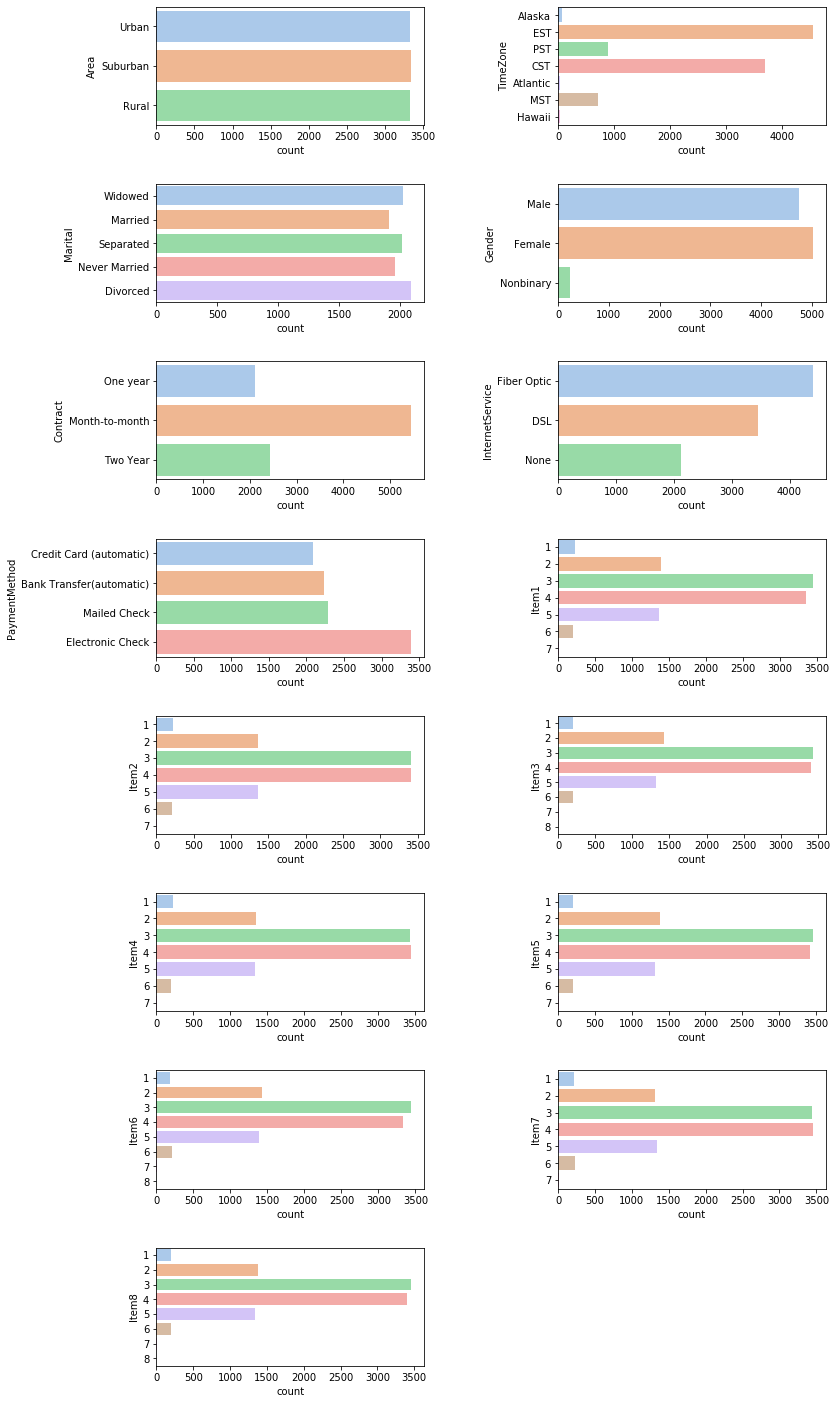

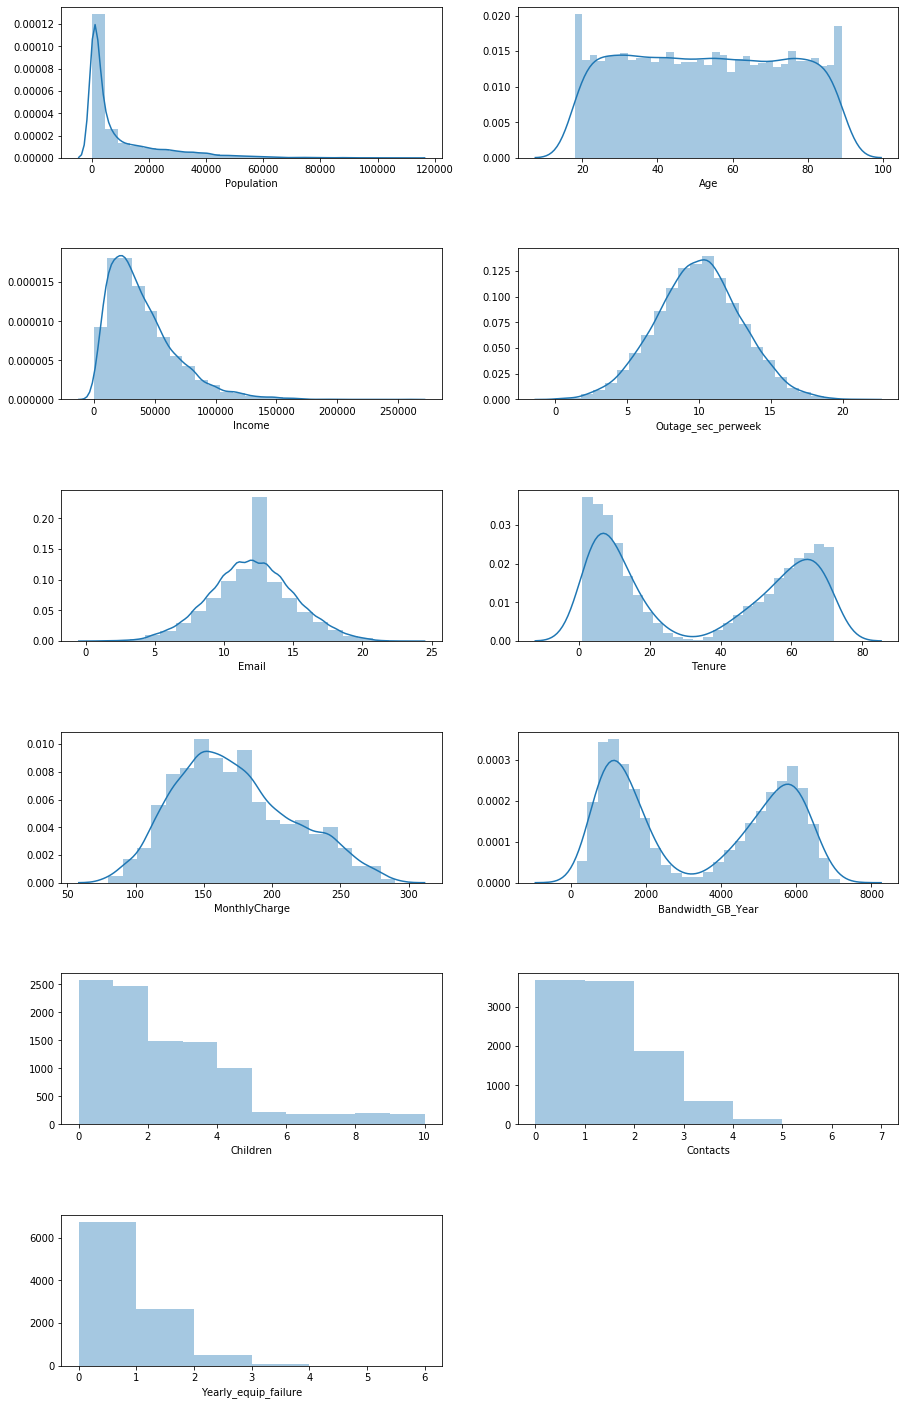

In [10]:
#Univariate visualizations
#Creates binary histograms
#set first color in seaborn color_palette to the `base_color` 
base_color = sns.color_palette('pastel')[0]
#set appropriate plotsize with subplots
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15,25))
plt.subplots_adjust(wspace=.2, hspace=.6)
#Create all thirteen plots to subplot and save
sns.countplot(data=df, y='Techie', color=base_color, ax=ax[0,0])
sns.countplot(data=df, y='Port_modem', color=base_color, ax=ax[0,1])
sns.countplot(data=df, y='Tablet', color=base_color, ax=ax[1,0])
sns.countplot(data=df, y='Phone', color=base_color, ax=ax[1,1])
sns.countplot(data=df, y='Multiple', color=base_color, ax=ax[2,0])
sns.countplot(data=df, y='OnlineSecurity', color=base_color, ax=ax[2,1])
sns.countplot(data=df, y='OnlineBackup', color=base_color, ax=ax[3,0])
sns.countplot(data=df, y='DeviceProtection', color=base_color, ax=ax[3,1])
sns.countplot(data=df, y='TechSupport', color=base_color, ax=ax[4,0])
sns.countplot(data=df, y='StreamingTV', color=base_color, ax=ax[4,1])
sns.countplot(data=df, y='StreamingMovies', color=base_color, ax=ax[5,0])
sns.countplot(data=df, y='PaperlessBilling', color=base_color, ax=ax[5,1])
sns.countplot(data=df, y='Churn', color=sns.color_palette('pastel')[2], ax=ax[6,0])
#hide axis for unused gridspace
plt.axis('off',ax=ax[6,1])
plt.savefig('univariate_binary_bars.png', bbox_inches='tight')

#creates categorical and ordinal bar charts
#set pastel palette
pastel = sns.color_palette('pastel')
#set appropriate plotsize with fourteen subplots
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(12,25))
plt.subplots_adjust(hspace=.5, wspace=0.5)
#Create all 7 plots to subplot and save
sns.countplot(data=cat_df, y='Area', palette='pastel', ax=ax[0,0])
sns.countplot(data=cat_df, y='TimeZone', palette='pastel', ax=ax[0,1])
sns.countplot(data=cat_df, y='Marital', palette='pastel', ax=ax[1,0])
sns.countplot(data=cat_df, y='Gender', palette='pastel', ax=ax[1,1])
sns.countplot(data=cat_df, y='Contract', palette='pastel', ax=ax[2,0])
sns.countplot(data=cat_df, y='InternetService', palette='pastel', ax=ax[2,1])
sns.countplot(data=cat_df, y='PaymentMethod', palette='pastel', ax=ax[3,0])
sns.countplot(data=df, y='Item1', palette='pastel', ax=ax[3,1])
sns.countplot(data=df, y='Item2', palette='pastel', ax=ax[4,0])
sns.countplot(data=df, y='Item3', palette='pastel', ax=ax[4,1])
sns.countplot(data=df, y='Item4', palette='pastel', ax=ax[5,0])
sns.countplot(data=df, y='Item5', palette='pastel', ax=ax[5,1])
sns.countplot(data=df, y='Item6', palette='pastel', ax=ax[6,0])
sns.countplot(data=df, y='Item7', palette='pastel', ax=ax[6,1])
sns.countplot(data=df, y='Item8', palette='pastel', ax=ax[7,0])
#hide axis for unused gridspace
plt.axis('off',ax=ax[7,1])
plt.savefig('univariate_categorical_ordinal_bars.png', bbox_inches='tight')

#create histogram for numeric variables
#set appropriate plotsize with twelve subplots
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,25))
plt.subplots_adjust(wspace=.2, hspace=.6)
#creates numeric histograms with kde overlays
sns.distplot(df['Population'], bins=25, ax=ax[0,0])
sns.distplot(df['Age'], bins=35, ax=ax[0,1])
sns.distplot(df['Income'], bins=25, ax=ax[1,0])
sns.distplot(df['Outage_sec_perweek'], bins=25, ax=ax[1,1])
sns.distplot(df['Email'], bins=20, ax=ax[2,0])
sns.distplot(df['Tenure'], bins=25, ax=ax[2,1])
sns.distplot(df['MonthlyCharge'], bins=20, ax=ax[3,0])
sns.distplot(df['Bandwidth_GB_Year'], bins=25, ax=ax[3,1])
#creates histograms without kde plots for count variables
sns.distplot(df['Children'], kde=False, bins=10, ax=ax[4,0])
sns.distplot(df['Contacts'], kde=False, bins=7, ax=ax[4,1])
sns.distplot(df['Yearly_equip_failure'], kde=False, bins=6, ax=ax[5,0])
#hide axis for unused gridspace
plt.axis('off',ax=ax[5,1])
plt.savefig('univariate_numeric_hists.png', bbox_inches='tight')

## Bivariate Visualizaiton

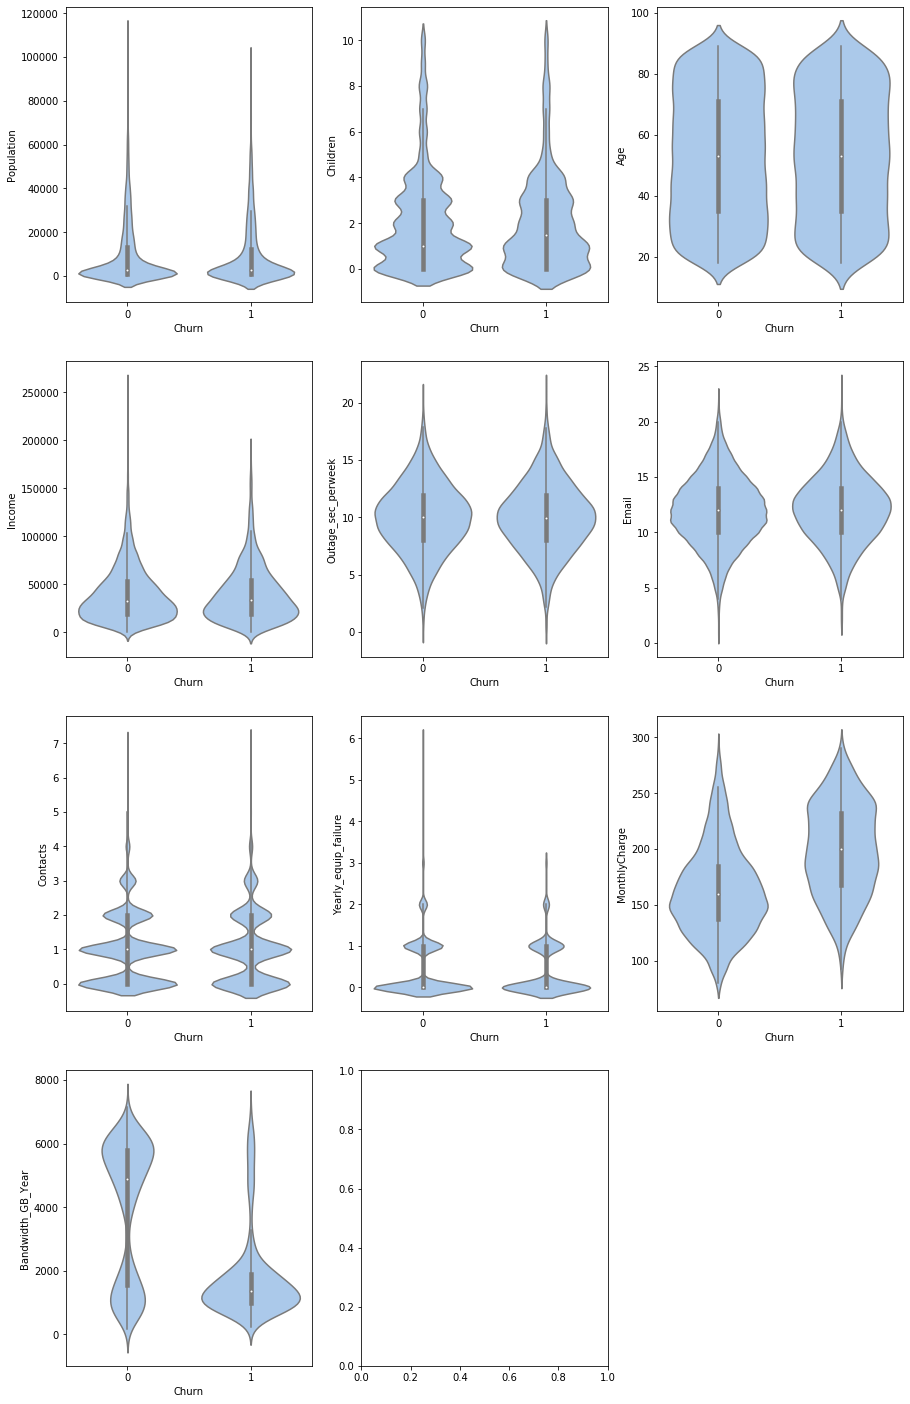

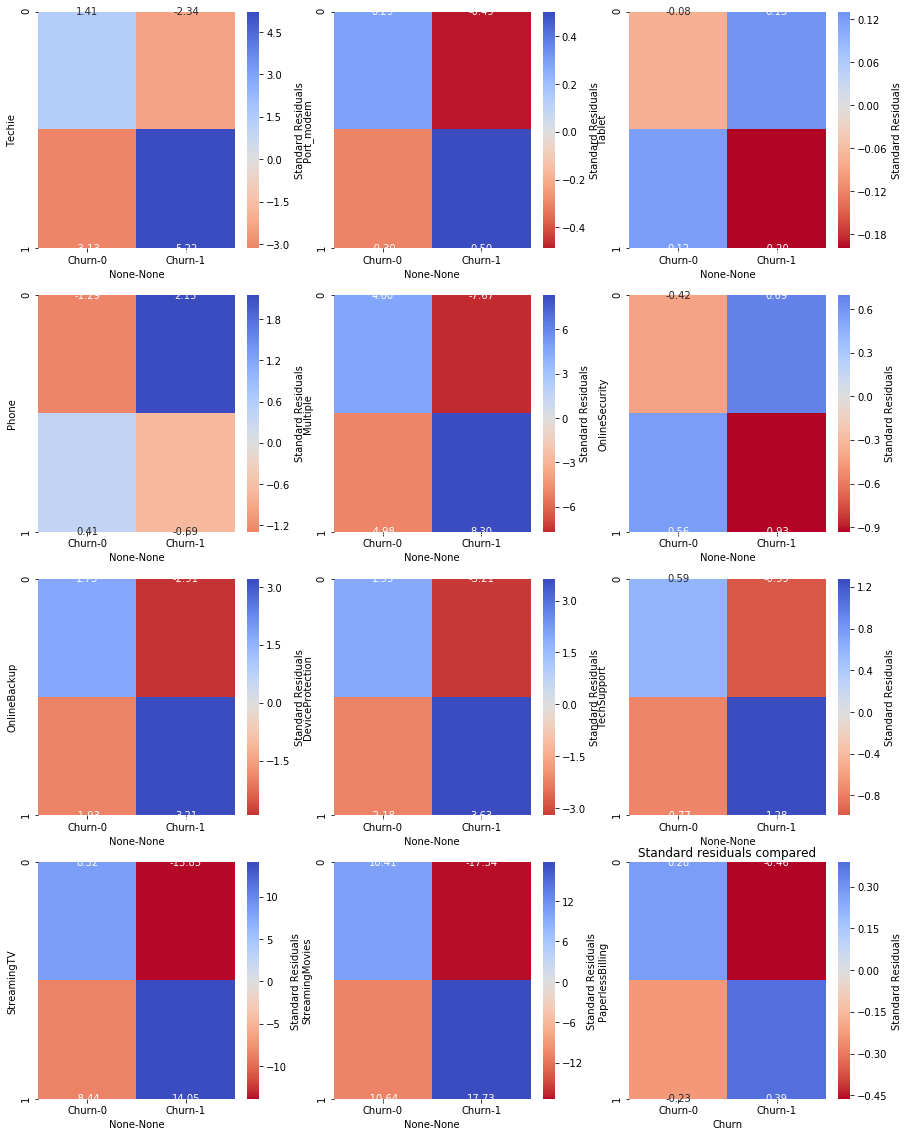

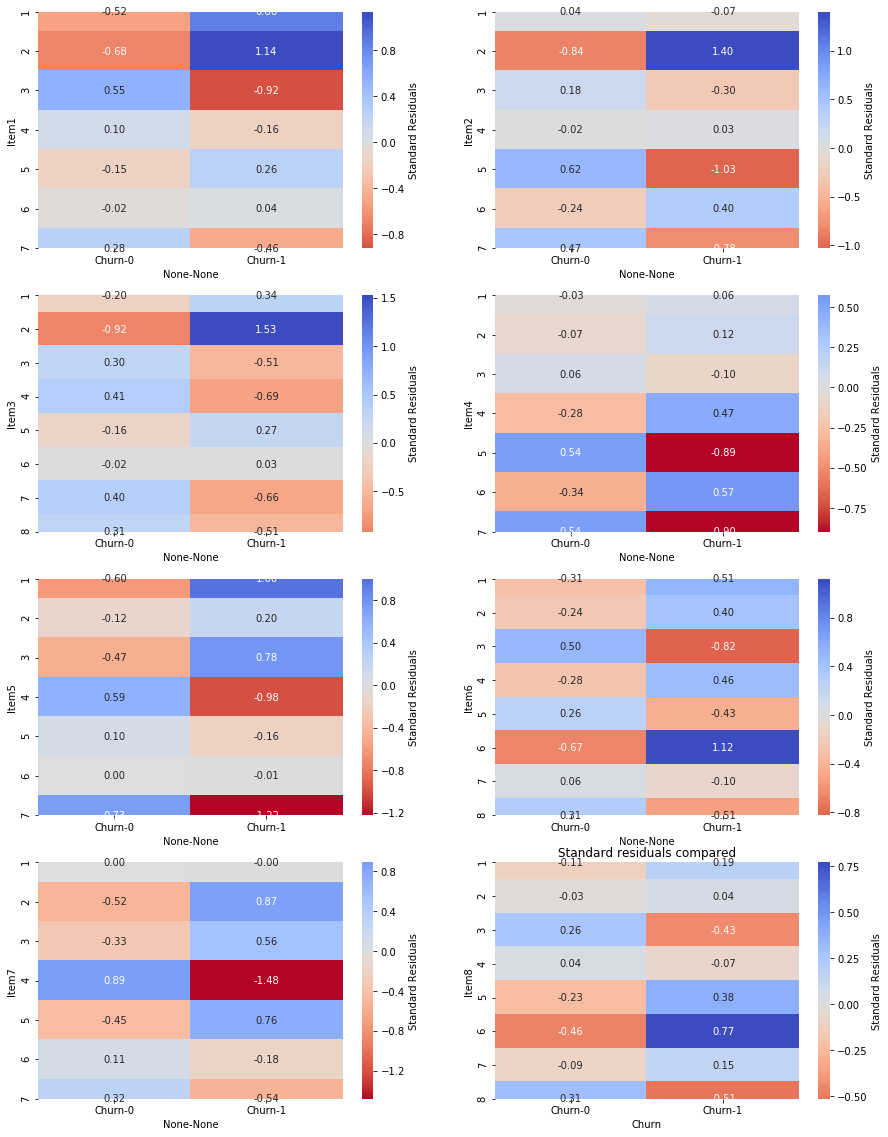

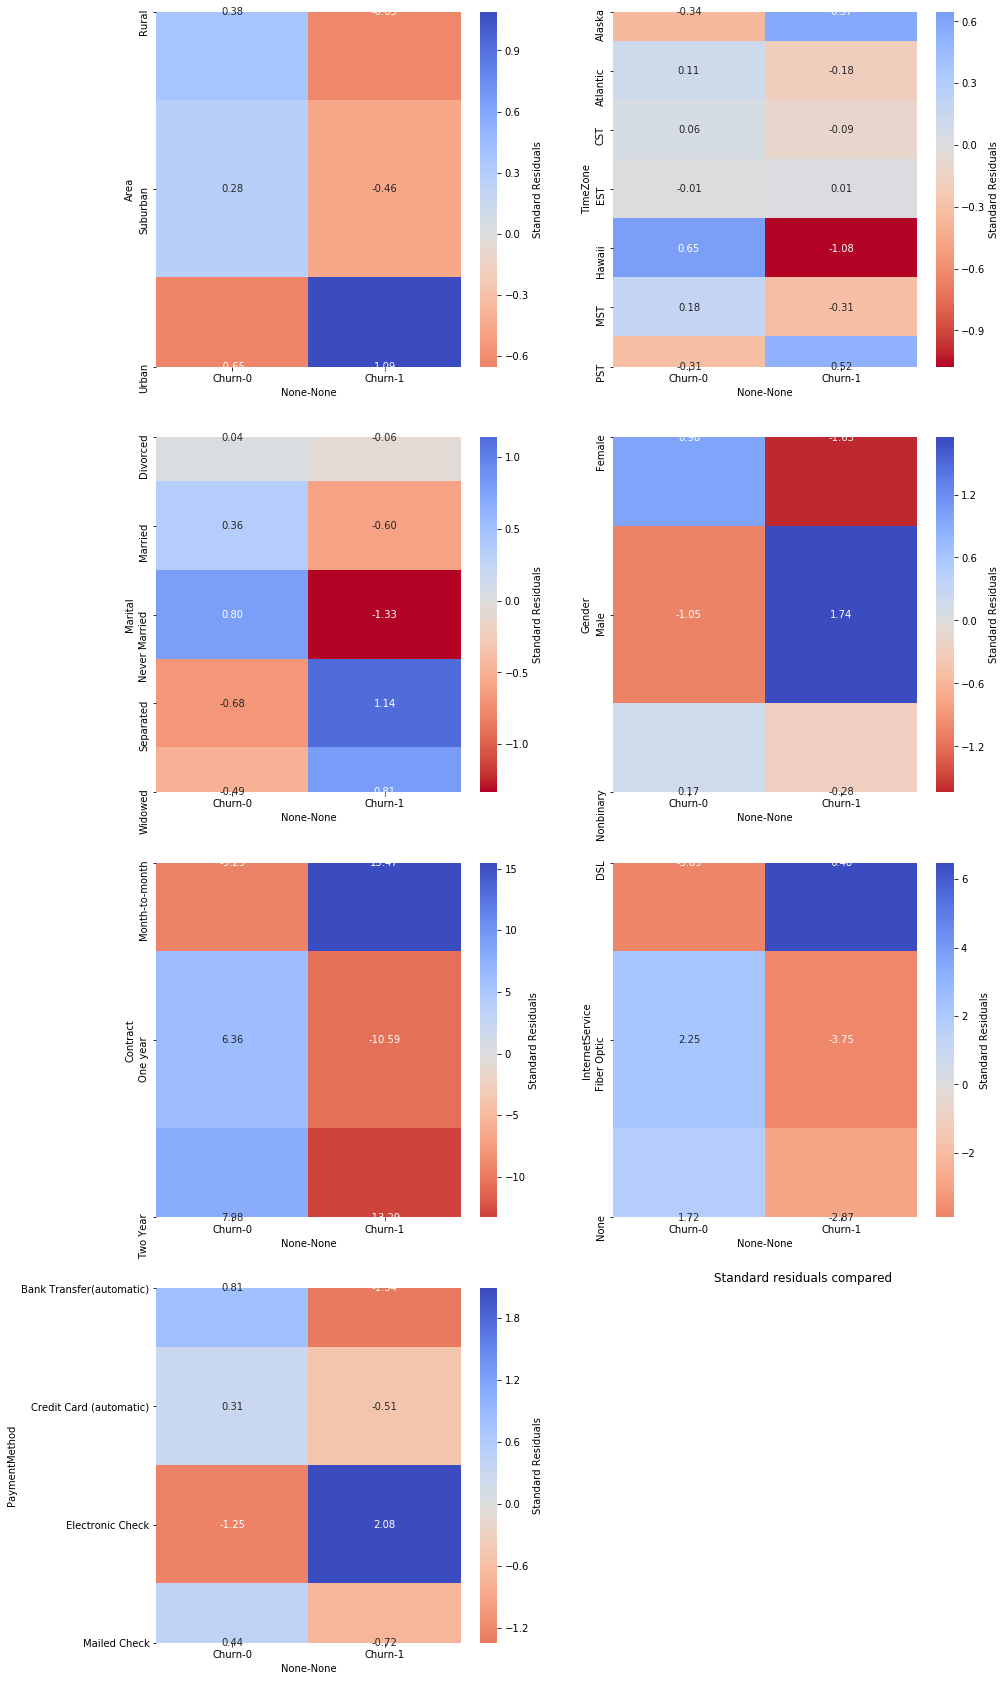

In [11]:
#visualize continuous variables vs Churn
#creates 12 subplots
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,25))
plt.subplots_adjust(wspace=.2, hspace=.2)
#plots a violiplot for each continuous variable
sns.violinplot(data=df, x='Churn', y='Population', color=base_color, ax=ax[0,0])
sns.violinplot(data=df, x='Churn', y='Children', color=base_color, ax=ax[0,1])
sns.violinplot(data=df, x='Churn', y='Age', color=base_color, ax=ax[0,2])
sns.violinplot(data=df, x='Churn', y='Income', color=base_color, ax=ax[1,0])
sns.violinplot(data=df, x='Churn', y='Outage_sec_perweek', color=base_color, ax=ax[1,1])
sns.violinplot(data=df, x='Churn', y='Email', color=base_color, ax=ax[1,2])
sns.violinplot(data=df, x='Churn', y='Contacts', color=base_color, ax=ax[2,0])
sns.violinplot(data=df, x='Churn', y='Yearly_equip_failure', color=base_color, ax=ax[2,1])
sns.violinplot(data=df, x='Churn', y='MonthlyCharge', color=base_color, ax=ax[2,2])
sns.violinplot(data=df, x='Churn', y='Bandwidth_GB_Year', color=base_color, ax=ax[3,0])
#hide axis for unused gridspace
plt.axis('off',ax=ax[3,1])
plt.savefig('bivariate_numeric_violins.png', bbox_inches='tight')

#define binary variables for heatmaps
binary_vars.remove('Churn')
#define ordinal vars for heatmaps
ord_vars = ['Item1','Item2','Item3','Item4',
            'Item5','Item6','Item7','Item8']

#visualize binary variables vs Churn
#creates 12 subplots
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
plt.subplots_adjust(wspace=.2, hspace=.2)
#declare axis positions for each subplot
x_pos = 0
y_pos = 0
#loop through each variable and create crosstabulation heatmap
for var in binary_vars:
    #creates contingency tables
    table, expected = rp.crosstab(df[var], df['Churn'], 
                                  margins=False, expected_freqs=True)
    #calculates residuals
    s_residual = (table-expected)/np.sqrt(expected)
    #creates and saves heatmap
    sns.heatmap(s_residual, annot = True, fmt = ".2f", cmap = "coolwarm_r", 
            center = 0, cbar_kws={'label': 'Standard Residuals'}, ax=ax[x_pos,y_pos])
    plt.title("Standard residuals compared")
    plt.xlabel('Churn')
    #change axis position
    if y_pos == 2:
        x_pos += 1
        y_pos = 0
    else:
        y_pos +=1
plt.savefig('bivariate_binary_heatmaps.png', bbox_inches='tight')
      
#visualize Ordinal variables vs Churn
#creates 8 subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
plt.subplots_adjust(wspace=.2, hspace=.2)
#declare axis positions for each subplot
x_pos = 0
y_pos = 0
#loop through each variable and create crosstabulation heatmap
for var in ord_vars:
    #creates contingency tables
    table, expected = rp.crosstab(df[var], df['Churn'], 
                                  margins=False, expected_freqs=True)
    #calculates residuals
    s_residual = (table-expected)/np.sqrt(expected)
    #creates and saves heatmap
    sns.heatmap(s_residual, annot = True, fmt = ".2f", cmap = "coolwarm_r", 
            center = 0, cbar_kws={'label': 'Standard Residuals'}, ax=ax[x_pos,y_pos])
    plt.title("Standard residuals compared")
    plt.xlabel('Churn')
    #change axis position
    if y_pos == 1:
        x_pos += 1
        y_pos = 0
    else:
        y_pos +=1
plt.savefig('bivariate_ordinal_heatmaps.png', bbox_inches='tight')

#visualize categorical variables vs Churn
#creates 8 subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,30))
plt.subplots_adjust(wspace=.2, hspace=.2)
#declare axis positions for each subplot
x_pos = 0
y_pos = 0
#loop through each variable and create crosstabulation heatmap
for var in cat_vars:
    #creates contingency tables
    table, expected = rp.crosstab(cat_df[var], cat_df['Churn'], 
                                  margins=False, expected_freqs=True)
    #calculates residuals
    s_residual = (table-expected)/np.sqrt(expected)
    #creates and saves heatmap
    sns.heatmap(s_residual, annot = True, fmt = ".2f", cmap = "coolwarm_r", 
            center = 0, cbar_kws={'label': 'Standard Residuals'}, ax=ax[x_pos,y_pos])
    plt.title("Standard residuals compared")
    plt.xlabel('Churn')
    #change axis position
    if y_pos == 1:
        x_pos += 1
        y_pos = 0
    else:
        y_pos +=1
#hide axis for unused gridspace
plt.axis('off',ax=ax[3,1])
plt.savefig('bivariate_categorical_heatmaps.png', bbox_inches='tight')

In [12]:
#export cleaned and prepared dataset
df.to_csv('prepared_dataset.csv',index=False)

# Part 2: Model Comparison and Analysis

In [13]:
#import necessary regression packages
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook as tqdm

In [14]:
#split data to training and test
x = df.drop(columns='Churn')
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#save full train and test set of predictor variables for later visualizations and slicing
x_train_full = x_train.copy()
x_test_full = x_test.copy()

#create multiple logistic regression model with all predictor variables
Xc = sm.add_constant(x_train)
logistic_regression = sm.Logit(y_train,Xc)
full_fitted_model = logistic_regression.fit()
full_fitted_model.summary()

C:\Users\jeffr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.211924
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6947
Method:                           MLE   Df Model:                           52
Date:                Sun, 27 Dec 2020   Pseudo R-squ.:                  0.6288
Time:                        11:21:22   Log-Likelihood:                -1483.5
converged:                       True   LL-Null:                       -3996.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2890      1.903     -1.729      0.084      -7.018       0.440
Population                            -2.865e-07   3.36e-06     -0.085      0.932   -6.86e-06    6.29e-06
Children                                  0.1833      0.167      1.100      0.271      -0.143       0.510
Age                                      -0.0190      0.018     -1.069      0.285      -0.054       0.016
Income                                 1.407e-06   1.65e-06      0.852      0.394   -1.83e-06    4.64e-06
Outage_sec_perweek                       -0.0085      0.016     -0.534      0.593      -0.040       0.023
Email                                    -0.0040      0.015     -0.259      0.796      -0.034       0.026
Contacts                                  0.0429      0.046      0.926      0.354      -0.048       0.134
Yearly_equip_failure                     -0.0564      0.075     -0.756      0.449      -0.202       0.090
Techie                                    1.2058      0.125      9.616      0.000       0.960       1.452
Port_modem                                0.1303      0.094      1.387      0.166      -0.054       0.314
Tablet                                   -0.1353      0.103     -1.318      0.187      -0.337       0.066
Phone                                    -0.4335      0.165     -2.622      0.009      -0.757      -0.109
Multiple                                  0.2404      0.246      0.977      0.329      -0.242       0.723
OnlineSecurity                            0.2165      0.378      0.572      0.567      -0.525       0.958
OnlineBackup                              0.0746      0.219      0.341      0.733      -0.354       0.503
DeviceProtection                          0.2561      0.283      0.904      0.366      -0.299       0.811
TechSupport                              -0.4919      0.210     -2.337      0.019      -0.904      -0.079
StreamingTV                               2.0055      0.622      3.224      0.001       0.786       3.225
StreamingMovies                           1.7654      0.443      3.983      0.000       0.897       2.634
PaperlessBilling                          0.1933      0.096      2.015      0.044       0.005       0.381
Tenure                                    0.3954      0.441      0.897      0.370      -0.468       1.259
MonthlyCharge                             0.0584      0.017      3.464      0.001       0.025       0.091
Bandwidth_GB_Year                        -0.0063      0.005     -1.164      0.244      -0.017       0.004
Item1                                     0.0073      0.066      0.109      0.913      -0.123       0.137
Item2                                    -0.0572      0.064     -0.899      0.368      -0.182       0.067
Item3                                    -0.0119      0.058     -0.207      0.836      -0.125       0.101
Item4                                    -0.0117      0.051  

In [15]:
#create Logistic regression variable
reg = LogisticRegression(solver='lbfgs', max_iter=10000)
#declare dictionary of variables to use depending on step of loop
var_dict={}
#declare dataframe to store auc score for each number of variables
auc_df = pd.DataFrame()
#declare number of loop iterations
iters = len(x_train.columns)

#begin loop
for i in tqdm(range(iters)):
    #train model
    model = reg.fit(x_train, y_train)
    #calculate auc score for model
    auc_score = roc_auc_score(y_test, model.predict(x_test))
    #add number of variables and the specified variables for the model to a dictionary for results reference
    number_of_vars = len(x_train.columns)
    predictors = list(x_train.columns)
    var_dict[number_of_vars] = predictors
    #save auc score for each number of variables to tempdf and append to to auc_df
    tempdf = pd.DataFrame({'Number of variables':[number_of_vars],
                           'AUC Score':[auc_score]})
    auc_df = auc_df.append(tempdf)
    #calculate feature importance by multiplying coeficient magnitude with reletive Standard deviation
    feat_rank =  pd.DataFrame((np.std(x_train,0)*(model.coef_[0])))
    #reset index and rename columns
    feat_rank.reset_index(inplace=True)
    feat_rank.rename({'index':'Feature',0:'Importance'}, axis='columns', inplace=True)
    #convert importance to absolute value
    feat_rank['Importance'] = feat_rank['Importance'].abs()
    #find least contributing variable
    var = feat_rank[feat_rank['Importance'] == feat_rank['Importance'].min()]['Feature'].values[0]
    #drop least contributing variable from train and test datasets
    x_train.drop(columns=var,inplace=True)
    x_test.drop(columns=var,inplace=True)

#assign number of input variables with the maximum auc score to max_auc variable
max_auc = auc_df[auc_df['AUC Score'] == auc_df['AUC Score'].max()]['Number of variables'].values[0]
#reduce x_train and x_test datasets by the new selection of variables and assign to reduced train and test datasets
x_train_reduced = x_train_full[var_dict[max_auc]]
x_test_reduced = x_test_full[var_dict[max_auc]]


#display max auc and number of variables
print('Maximum AUC and number of variables:')
display(auc_df[auc_df['AUC Score'] == auc_df['AUC Score'].max()])
print('\n\nVariable Names:')
var_dict[max_auc]


Maximum AUC and number of variables:


,Number of variables,AUC Score
0,8,0.869166




Variable Names:


['StreamingTV',
 'StreamingMovies',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Contract_One year',
 'Contract_Two Year',
 'InternetService_Fiber Optic']

In [16]:
#create and display a multiple logistic regression model with reduced predictor variables
Xc = sm.add_constant(x_train_reduced)
logistic_regression = sm.Logit(y_train,Xc)
full_fitted_model = logistic_regression.fit()
full_fitted_model.summary()

C:\Users\jeffr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.227130
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6991
Method:                           MLE   Df Model:                            8
Date:                Sun, 27 Dec 2020   Pseudo R-squ.:                  0.6022
Time:                        11:22:21   Log-Likelihood:                -1589.9
converged:                       True   LL-Null:                       -3996.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -5.3062      0.261    -20.301      0.000      -5.819      -4.794
StreamingTV                     0.9720      0.122      7.970      0.000       0.733       1.211
StreamingMovies                 1.0183      0.133      7.671      0.000       0.758       1.278
Tenure                         -0.1913      0.022     -8.775      0.000      -0.234      -0.149
MonthlyCharge                   0.0385      0.002     16.283      0.000       0.034       0.043
Bandwidth_GB_Year               0.0010      0.000      3.842      0.000       0.000       0.002
Contract_One year              -3.2865      0.149    -22.053      0.000      -3.579      -2.994
Contract_Two Year              -3.3369      0.146    -22.817      0.000      -3.624      -3.050
InternetService_Fiber Optic    -1.4593      0.144    -10.121      0.000      -1.742      -1.177
===============================================================================================
"""

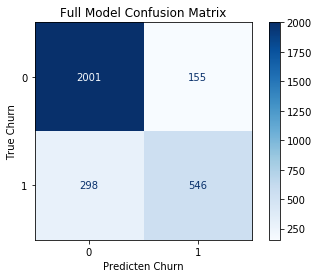

specificity:  0.646
sensitivity:  0.914
accuracy:  0.838 






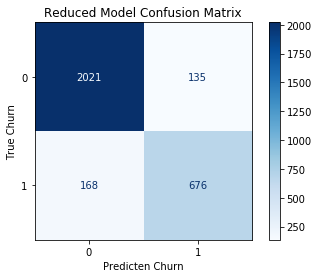

specificity:  0.801
sensitivity:  0.937
accuracy:  0.899


In [17]:
from sklearn.metrics import plot_confusion_matrix

#train scikit learn model on full variable selection
model = reg.fit(x_train_full, y_train)
#create and show confusion matrix plot
plot_confusion_matrix(model, x_test_full, y_test,cmap=plt.cm.Blues)
plt.title('Full Model Confusion Matrix')
plt.xlabel('Predicten Churn')
plt.ylabel('True Churn')
plt.show()
#define predicted value counts
false_neg = 299
true_pos = 545
false_pos = 186
true_neg = 1970
#print useful model statistics
print('specificity: ', '{:.3f}'.format(true_pos/(true_pos+false_neg)))
print('sensitivity: ', '{:.3f}'.format(true_neg/(true_neg+false_pos)))
print('accuracy: ', '{:.3f}'.format((true_pos+true_neg)/3000),'\n\n\n\n')

#train scikit learn model on reduced variable selection
model = reg.fit(x_train_reduced, y_train)
#create and show confusion matrix plot
plot_confusion_matrix(model, x_test_reduced, y_test,cmap=plt.cm.Blues)
plt.title('Reduced Model Confusion Matrix')
plt.xlabel('Predicten Churn')
plt.ylabel('True Churn')
plt.show()
#define predicted value counts
false_neg = 168
true_pos = 676
false_pos = 135
true_neg = 2021
#print useful model statistics
print('specificity: ', '{:.3f}'.format(true_pos/(true_pos+false_neg)))
print('sensitivity: ', '{:.3f}'.format(true_neg/(true_neg+false_pos)))
print('accuracy: ', '{:.3f}'.format((true_pos+true_neg)/3000))